In [3]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import scipy.stats as stats
from sklearn import preprocessing
from matplotlib import cm
from matplotlib.dates import DateFormatter

# Site Data

In [16]:
sites = pd.read_csv('Data/2023_scm_sites.csv')
sites = clean_columns(sites)
sites

record_id   latitude  longitude
0         POV_DUN  42.387460 -76.399248
1         DIP_FLE  42.600981 -76.513185
2         DIP_CUR  42.432905 -76.244050
3         GAB_STE  43.072170 -73.528350
4         SMI_CRO  42.846300 -74.667100
5         SMI_CAN  42.875550 -75.055300
6         SMI_KEL  42.959550 -74.659700
7         SMI_COB  42.660200 -74.509550
8         SMI_DOU  43.054300 -74.842200
9         SMI_MCC  43.114600 -74.841200
10        SMI_HOL  42.900000 -74.297800
11        DIP_PAT  42.903554 -76.664187
12        MIL_YOD  42.995964 -75.526558
13        MIL_CHA  43.029780 -75.452134
14        MIL_MCC  42.922110 -75.360383
15        KAT_SAU  42.058264 -77.785615
16      KAT_SAU_2  42.059884 -77.800873
17        KAT_TEE  42.335635 -78.761892
18      KAT_TEE_2  42.346801 -78.741829
19      KAT_HAB_2  42.553359 -78.881664
20        KAT_HAB  42.508615 -78.913291
21        KAT_BAR  42.049932 -77.137233
22        SMI_LAT  42.691200 -75.530800
23        SMI_DUR  43.064200 -75.937100
24        SMI_HOF  42.351500 -75.718100
25        SMI_JOH  43.003600 -75.590700
26      SMI_JOH_2  43.064800 -75.673300
27        GAB_ALL  42.923640 -73.680890
28        KAT_JEF  42.243724 -79.070508
29      KAT_JEF_2  42.269953 -79.088346
30        STA_WIL  43.015747 -77.132345
31      STA_HEM_2  42.863661 -77.081969
32        STA_HEM  42.912770 -77.105291
33        STA_SWE  42.798289 -78.099610
34        STA_COL  43.177249 -77.845157
35      WIS_COO_2  41.843899 -73.606906
36        WIS_COO  41.879183 -73.613636
37        LET_NOB  42.858024 -77.951250
38        LET_TAB  42.638843 -78.016009
39        WIS_HIG  41.748460 -73.968149
40        WIS_MEG  42.003939 -73.866452
41        WIS_KEN  41.665349 -73.956851
42        ZUE_REE  42.783407 -76.983286
43  DEG_PER_STRIP  42.673174 -76.229084
44   DEG_FOU_WOOD  42.577320 -76.281330
45   DEG_DIE_HILL  42.602460 -76.149470
46    DEG_DIE_SWC  42.637020 -76.129940
47  DEG_YOU_BOCES  42.618330 -76.160460
48  DEG_YOU_OSHEA  42.643870 -76.166880
49  DEG_YOU_JONES  42.683810 -76.157370
50        DEG_VIL  42.689050 -76.168560
51        SEA_HOO  42.625396 -77.016250
52        MIL_HUM  43.048594 -75.313256
53        ONE_TER  44.592513 -75.186411
54        ONE_ADO  44.639866 -74.945410
55        ONE_STA  44.771089 -74.660663

# Climate Data

In [36]:
climate = pd.read_csv("Data/2023_scm_climate.csv")
climate = clean_columns(climate)
climate["date"] = pd.to_datetime(climate["date"], format="%m/%d/%y")
climate["week"] = climate["date"].dt.strftime("%U").astype(int)
# climate


# Weekly Climate Data

In [37]:
one_week_climate = pd.read_csv("Data/2023_adults_one_week_climate.csv")
one_week_climate["collection_date"] = pd.to_datetime(one_week_climate["collection_date"])

two_week_climate = pd.read_csv("Data/2023_adults_two_week_climate.csv")
two_week_climate["collection_date"] = pd.to_datetime(two_week_climate["collection_date"])


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_23193/197453588.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  one_week_climate["collection_date"] = pd.to_datetime(one_week_climate["collection_date"])
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_23193/197453588.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  two_week_climate["collection_date"] = pd.to_datetime(two_week_climate["collection_date"])


# GDD Data

In [38]:
gdd = pd.read_csv("Data/2023_scm_gdd.csv")
gdd = clean_columns(gdd)
gdd["date"] = pd.to_datetime(gdd["date"], format="%m/%d/%y")

# Management Data

In [39]:
management = pd.read_csv("Data/2023_management.csv")
management = clean_columns(management)
#management


In [40]:
planting_date = pd.read_csv('Data/2023_scm_planting_dates.csv')
planting_date.head()

Record ID Planting date
0        LET_TAB        5/7/23
1        GAB_ALL        5/9/23
2        SMI_CRO        5/9/23
3        SMI_DOU       5/10/23
4  DEG_PER_STRIP       5/10/23

# Soil Data

In [41]:
soil = pd.read_csv("Data/2023_scm_soil.csv")
soil = clean_columns(soil)
#soil

In [42]:
dairy_one = pd.read_csv('Data/2023_dairy_one.csv')
dairy_one = clean_columns(dairy_one)
#dairy_one

# Landscape Data

## 500m Radius

In [43]:
cdl_500 = pd.read_csv("Data/Landscape/cdl_500_history.csv")
cdl_500 = cdl_500.drop("Unnamed: 0", axis=1)


## 1000m Radius

In [44]:
cdl_1000 = pd.read_csv("Data/Landscape/cdl_1000_history.csv")
cdl_1000 = cdl_1000.drop("Unnamed: 0", axis=1)


## 2000m Radius

In [45]:
cdl_2000 = pd.read_csv("Data/Landscape/cdl_2000_history.csv")
cdl_2000 = cdl_2000.drop("Unnamed: 0", axis=1)


## 3000m Radius

In [46]:
cdl_3000 = pd.read_csv("Data/Landscape/cdl_3000_history.csv")
cdl_3000 = cdl_3000.drop("Unnamed: 0", axis=1)


# Sticky Card Data

In [4]:
adults = pd.read_csv("Data/2023_scm_counts.csv")
adults = clean_columns(adults)
adults["collection_date"] = pd.to_datetime(adults["collection_date"], format="%m/%d/%y")
adults["week"] = adults["collection_date"].dt.strftime("%U")
adults = adults.drop(["initials", "notes"], axis=1)
adults = adults.dropna()
adults = adults.rename({"site": "record_id"}, axis=1)
adults["total_f_scm"] = adults["n_scm_i_f"] + adults["n_scm_o_f"]
adults["total_m_scm"] = adults["n_scm_i_m"] + adults["n_scm_o_m"]
adults["total_scm"] = adults["total_m_scm"] + adults["total_f_scm"]
adults


card_id data_collector   record_id collection_date  n_scm_i_m  \
0        2920   Janice Degni     DEG_VIL      2023-06-13       32.0   
10       6596  Shea Crowther  CUR_FIE_IN      2023-09-05        0.0   
13       6808  Shea Crowther  CUR_FIE_IN      2023-09-26        0.0   
14       6824  Shea Crowther  CUR_FIE_IN      2023-10-03        0.0   
15       7002  Shea Crowther  CUR_FIE_IN      2023-10-24       11.0   
...       ...            ...         ...             ...        ...   
2353     2272  Marion Zuefle     ZUE_REE      2023-04-26       44.0   
2355     2384  Marion Zuefle     ZUE_REE      2023-05-02       40.0   
2357     2418  Marion Zuefle     ZUE_REE      2023-05-09       45.0   
2359     2552  Marion Zuefle     ZUE_REE      2023-05-17       38.0   
2360     2636  Marion Zuefle     ZUE_REE      2023-05-23       86.0   

      n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o week  \
0          15.0       14.0        6.0              0.0              0.0   24   
10          0.0        0.0        0.0              0.0              0.0   36   
13          0.0        0.0        0.0              0.0              0.0   39   
14          0.0        0.0        0.0              0.0              0.0   40   
15          8.0        2.0        5.0              1.0              6.0   43   
...         ...        ...        ...              ...              ...  ...   
2353       34.0       21.0       34.0              0.0              0.0   17   
2355       48.0       15.0       31.0              7.0              0.0   18   
2357       47.0       27.0       46.0              3.0              4.0   19   
2359       21.0        5.0        3.0              4.0              2.0   20   
2360       68.0       16.0       10.0              0.0              0.0   21   

      total_f_scm  total_m_scm  total_scm  
0            21.0         46.0       67.0  
10            0.0          0.0        0.0  
13            0.0          0.0        0.0  
14            0.0          0.0        0.0  
15           13.0         13.0       26.0  
...           ...          ...        ...  
2353         68.0         65.0      133.0  
2355         79.0         55.0      134.0  
2357         93.0         72.0      165.0  
2359         24.0         43.0       67.0  
2360         78.0        102.0      180.0  

[820 rows x 14 columns]

# Visualize All Sticky Card Data 

<Axes: >

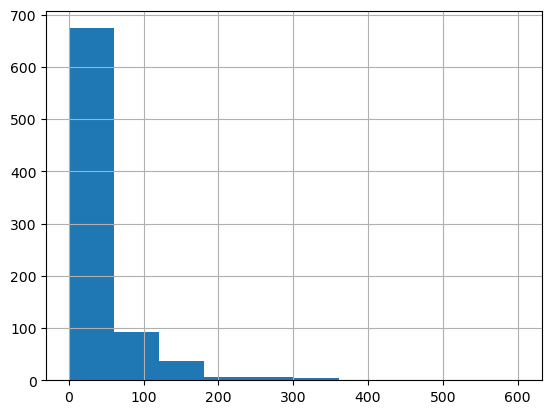

In [65]:
adults['total_scm'].hist()

In [5]:
site_dict = {
    "Janice Degni": [
        "DEG_DIE_HILL",
        "DEG_DIE_SWC",
        "DEG_FOU_WOOD",
        "DEG_PER_STRIP",
        "DEG_VIL",
        "DEG_YOU_BOCES",
        "DEG_YOU_JONES",
        "DEG_YOU_OSHEA",
    ],
    "Poveda Lab": ["DIP_CUR", "DIP_FLE", "DIP_PAT", "POV_DUN"],
    "Aaron Gabriel": ["GAB_ALL", "GAB_STE"],
    "Katelyn Miller": [
        "KAT_BAR",
        "KAT_HAB",
        "KAT_HAB_2",
        "KAT_JEF",
        "KAT_JEF_2",
        "KAT_SAU",
        "KAT_SAU_2",
        "KAT_TEE",
        "KAT_TEE_2",
    ],
    "Jodi Letham": ["LET_NOB", "LET_TAB"],
    "Jeff Miller": ["MIL_CHA", "MIL_MCC", "MIL_YOD"],
    "Abby Seaman": ["SEA_HOO"],
    "Erik Smith": [
        "SMI_CAN",
        "SMI_COB",
        "SMI_CRO",
        "SMI_DOU",
        "SMI_DUR",
        "SMI_HOF",
        "SMI_HOL",
        "SMI_JOH",
        "SMI_JOH_2",
        "SMI_KEL",
        "SMI_LAT",
        "SMI_MCC",
    ],
    "Mike Stanyard": ["STA_COL", "STA_HEM", "STA_HEM_2", "STA_SWE", "STA_WIL"],
    "Ken Wise": ["WIS_COO", "WIS_COO_2", "WIS_HIG", "WIS_KEN", "WIS_MEG"],
    "Marion Zuefle": ["ZUE_REE"],
}


In [6]:
collectors = site_dict.keys()
collectors

dict_keys(['Janice Degni', 'Poveda Lab', 'Aaron Gabriel', 'Katelyn Miller', 'Jodi Letham', 'Jeff Miller', 'Abby Seaman', 'Erik Smith', 'Mike Stanyard', 'Ken Wise', 'Marion Zuefle'])

In [9]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.rcParams.update({'font.size': 24})

for i in collectors: 
    df = adults[["data_collector", "record_id", "collection_date", "total_scm"]]
    df = df.loc[df['record_id'].isin(site_dict[i])] 
    df = df.sort_values('collection_date')

    colors = sns.color_palette('Set3', n_colors=len(site_dict[i]))
    cmap = dict(zip(site_dict[i], colors))

    fig, ax = plt.subplots(figsize=(12,6))
    sns.lineplot(x="collection_date", y='total_scm', hue='record_id', data=df, palette=cmap, linewidth = 2.5)

    ax.set_title('Sticky Card SCM Adult Counts')
    ax.set_xlabel('Collection Date')
    ax.set_ylabel('SCM Adults')
    ax.set_xlim([date(2023, 4, 1), date(2023, 7, 1)])
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

    handles, previous_labels = ax.get_legend_handles_labels()

    legend_labels = []

    for j in range(1, len(np.unique(df['record_id'])) + 1):
        legend_labels.append('Site ' + str(j))

    for line in handles: 
        line.set_linewidth(4)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.legend(title='Farm', labels = legend_labels, handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), markerscale = 5)

    fig.savefig('Figures/Line/' + i + '_weekly_adult_counts')
    plt.close()


/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

In [10]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.rcParams.update({'font.size': 24})

for i in collectors:
    df = adults[["data_collector", "record_id", "collection_date", "total_scm"]]
    df = df.loc[df["record_id"].isin(site_dict[i])]
    df["collection_date"] = df.collection_date.dt.strftime("%m/%d")
    df = df.sort_values("collection_date").reset_index()

    colors = sns.color_palette("Set3", n_colors=len(site_dict[i]))
    cmap = dict(zip(site_dict[i], colors))
    g = sns.catplot(
        x="collection_date",
        y="total_scm",
        hue="record_id",
        col="record_id",
        data=df,
        kind="bar",
        palette=cmap,
        height=6,
        sharex=True,
        col_wrap=3,
        dodge=False, 
        errorbar=None
    )

    labels = []

    for j in range(1, len(np.unique(df["record_id"])) + 1):
        labels.append("Site " + str(j))

    g.set_axis_labels("Collection Date", "Total Adult SCM")

    for ax in g.axes.flat:
        ax.tick_params(labelbottom=True)
        for label in ax.get_xticklabels():
            label.set_rotation(90)
        

    for idx, ax in enumerate(g.axes.flat):
        ax.set_title(labels[idx])

    plt.subplots_adjust(bottom=0.1, left=0.06, hspace=0.3)


    g.savefig('Figures/Bar/' + i + '_weekly_adult_counts')
    plt.close()


/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

# Create Table - All Features

In [18]:
adult_features = adults.merge(one_week_climate, on=["record_id", "collection_date"])
adult_features = adult_features.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_features = adult_features.merge(
    management, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_features = adult_features.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_features = adult_features.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_features = adult_features.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_features = adult_features.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_features = adult_features.merge(
    gdd[
        [
            "record_id",
            "date",
            "gdd_fahrenheit_simple",
            "gdd_fahrenheit_simple_cumsum",
            "gdd_fahrenheit_sine",
            "gdd_fahrenheit_sine_cum_sum",
        ]
    ],
    left_on=["record_id", "collection_date"],
    right_on=["record_id", "date"],
).drop("date", axis=1)
adult_features = adult_features.merge(soil, on='record_id')
adult_features = adult_features.merge(dairy_one, on='record_id')
adult_features = adult_features.merge(sites, on='record_id')


adult_features.to_csv("Data/2023_adult_features.csv")


# Correlations

In [190]:
adult_location = adults.merge(sites, on='record_id')[['collection_date', 'total_scm', 'latitude', 'longitude']]
adult_location

collection_date  total_scm   latitude  longitude
0        2023-04-21       38.0  42.602460 -76.149470
1        2023-04-27      115.0  42.602460 -76.149470
2        2023-05-04      324.0  42.602460 -76.149470
3        2023-05-11      149.0  42.602460 -76.149470
4        2023-05-18       28.0  42.602460 -76.149470
..              ...        ...        ...        ...
433      2023-04-19        8.0  42.783407 -76.983286
434      2023-04-26      133.0  42.783407 -76.983286
435      2023-05-02      165.0  42.783407 -76.983286
436      2023-05-17       67.0  42.783407 -76.983286
437      2023-05-23      180.0  42.783407 -76.983286

[438 rows x 4 columns]

In [191]:
corr = adult_location.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

## Climate and Sticky Card Data

In [19]:
adult_climate = adults.merge(one_week_climate, on=["record_id", "collection_date"])
adult_climate = adult_climate.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_climate


card_id data_collector     record_id collection_date  n_scm_i_m  \
0       2246   Janice Degni  DEG_DIE_HILL      2023-04-21       16.0   
1       2266   Janice Degni  DEG_DIE_HILL      2023-04-27       43.0   
2       2374   Janice Degni  DEG_DIE_HILL      2023-05-04       40.0   
3       2560   Janice Degni  DEG_DIE_HILL      2023-05-11       80.0   
4       2558   Janice Degni  DEG_DIE_HILL      2023-05-18       21.0   
..       ...            ...           ...             ...        ...   
413     2270  Marion Zuefle       ZUE_REE      2023-04-19        1.0   
414     2272  Marion Zuefle       ZUE_REE      2023-04-26       44.0   
415     2384  Marion Zuefle       ZUE_REE      2023-05-02       45.0   
416     2552  Marion Zuefle       ZUE_REE      2023-05-17       38.0   
417     2636  Marion Zuefle       ZUE_REE      2023-05-23       86.0   

     n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o  ...  \
0         10.0        7.0        5.0              0.0              0.0  ...   
1          9.0       51.0       12.0              0.0              0.0  ...   
2         20.0      136.0      128.0              9.0             44.0  ...   
3         18.0       36.0       15.0              3.0              0.0  ...   
4          0.0        4.0        3.0              0.0              0.0  ...   
..         ...        ...        ...              ...              ...  ...   
413        2.0        4.0        1.0              0.0              0.0  ...   
414       34.0       21.0       34.0              0.0              0.0  ...   
415       47.0       27.0       46.0              3.0              4.0  ...   
416       21.0        5.0        3.0              4.0              2.0  ...   
417       68.0       16.0       10.0              0.0              0.0  ...   

    vpd_min_1_week  vpd_max_1_week  rain_inches_1_week  min_temp_f_2_week  \
0          0.84875        14.81875                0.62          36.453333   
1          0.56500        10.19875                0.74          39.513333   
2          0.31875         5.09375                3.15          37.193333   
3          0.30000        10.51125                0.38          37.206667   
4          0.74500        16.07125                0.00          37.013333   
..             ...             ...                 ...                ...   
413        2.83250        20.01000                0.38          41.393333   
414        0.83500        10.20625                1.15          43.806667   
415        0.42625         5.83875                1.95          39.040000   
416        3.31625        18.68125                0.00          43.186667   
417        2.35500        14.88750                0.71          45.026667   

     ave_temp_f_2_week  max_temp_f_2_week  mean_dew_point_2_week  \
0            48.846667          61.233333              34.286667   
1            51.126667          62.740000              39.380000   
2            45.886667          54.580000              37.933333   
3            46.666667          56.126667              38.220000   
4            49.786667          62.580000              36.780000   
..                 ...                ...                    ...   
413          53.100000          64.800000              37.593333   
414          54.886667          65.986667              40.566667   
415          47.613333          56.193333              38.720000   
416          53.940000          64.680000              39.193333   
417          56.393333          67.760000              39.566667   

     vpd_min_2_week  vpd_max_2_week  rain_inches_2_week  
0          0.940667       13.328000                0.62  
1          0.731333       13.578667                1.36  
2          0.460667        7.826000                3.77  
3          0.304000        8.134667                3.39  
4          0.534000       13.219333                0.38  
..              ...             ...                 ...  
413        2.030000       14.908000        

In [20]:
adult_climate_subset = adult_climate[
    [
        "collection_date",
        "n_scm_i_m",
        "n_scm_i_f",
        "n_scm_o_m",
        "n_scm_o_f",
        "n_d_florilega_i",
        "n_d_florilega_o",
        "total_f_scm",
        "total_m_scm",
        "total_scm",
        "min_temp_f_1_week",
        "ave_temp_f_1_week",
        "max_temp_f_1_week",
        "rain_inches_1_week",
        "min_temp_f_2_week",
        "ave_temp_f_2_week",
        "max_temp_f_2_week",
        "rain_inches_2_week",
        "mean_dew_point_1_week",
        "vpd_min_1_week",
        "mean_dew_point_2_week",
        "vpd_min_2_week",
        "vpd_max_2_week", 
        "vpd_max_1_week",
    ]
]

adult_climate_subset["collection_date"] = pd.to_datetime(
    adult_climate_subset["collection_date"], format="%m/%d/%y"
)


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/3642522357.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_climate_subset["collection_date"] = pd.to_datetime(


In [21]:
corr = adult_climate_subset.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

# GDD and Sticky Card Data

In [22]:
gdd_adults = adults.merge(gdd, left_on=['record_id', 'collection_date'], right_on=['record_id', 'date']).drop(['card_id', 'data_collector', 'record_id'], axis=1)

In [23]:
corr = gdd_adults.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

## Landscape and Sticky Card Data

### 500m

In [25]:
adults_500 = adults.merge(cdl_500, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

adults_500 = adults_500.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_500["collection_date"] = pd.to_datetime(
    adults_500["collection_date"], format="%m/%d/%y"
)


In [26]:
corr = adults_500.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 1000m

In [27]:
adults_1000 = adults.merge(cdl_1000, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

adults_1000 = adults_1000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_1000["collection_date"] = pd.to_datetime(
    adults_1000["collection_date"], format="%m/%d/%y"
)


In [28]:
corr = adults_1000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 2000m

In [29]:
adults_2000 = adults.merge(cdl_2000, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

adults_2000 = adults_2000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_2000["collection_date"] = pd.to_datetime(
    adults_2000["collection_date"], format="%m/%d/%y"
)


In [30]:
corr = adults_2000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 3000m

In [31]:
adults_3000 = adults.merge(cdl_3000, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

adults_3000 = adults_3000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_3000["collection_date"] = pd.to_datetime(
    adults_3000["collection_date"], format="%m/%d/%y"
)


In [32]:
corr = adults_3000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


# Management and Sticky Card Data

In [33]:
adults_management = adults.merge(management, left_on="record_id", right_on="field_id")


In [34]:
le = preprocessing.LabelEncoder()
adults_management["cover_crop"] = le.fit_transform(adults_management["cover_crop"])
adults_management["manure"] = le.fit_transform(adults_management["manure"])
adults_management["tillage"] = le.fit_transform(adults_management["tillage"])


In [35]:
stats.pointbiserialr(adults_management["total_scm"], adults_management["cover_crop"])


SignificanceResult(statistic=0.12054662916142507, pvalue=0.011574502247889584)

In [36]:
cover_crop = adults_management[
    ["record_id", "total_f_scm", "total_m_scm", "total_scm", "cover_crop"]
]
cover_crop["cover_crop"].replace(0, "No", inplace=True)
cover_crop["cover_crop"].replace(1, "Partial", inplace=True)
cover_crop["cover_crop"].replace(2, "Yes", inplace=True)
cover_crop


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/744347347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover_crop["cover_crop"].replace(0, "No", inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/744347347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover_crop["cover_crop"].replace(1, "Partial", inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/744347347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

record_id  total_f_scm  total_m_scm  total_scm cover_crop
0    DEG_DIE_HILL         15.0         23.0       38.0         No
1    DEG_DIE_HILL         21.0         94.0      115.0         No
2    DEG_DIE_HILL        148.0        176.0      324.0         No
3    DEG_DIE_HILL         33.0        116.0      149.0         No
4    DEG_DIE_HILL          3.0         25.0       28.0         No
..            ...          ...          ...        ...        ...
433       ZUE_REE          3.0          5.0        8.0         No
434       ZUE_REE         68.0         65.0      133.0         No
435       ZUE_REE         93.0         72.0      165.0         No
436       ZUE_REE         24.0         43.0       67.0         No
437       ZUE_REE         78.0        102.0      180.0         No

[438 rows x 5 columns]

<Axes: title={'center': 'total_scm'}, xlabel='[cover_crop]'>

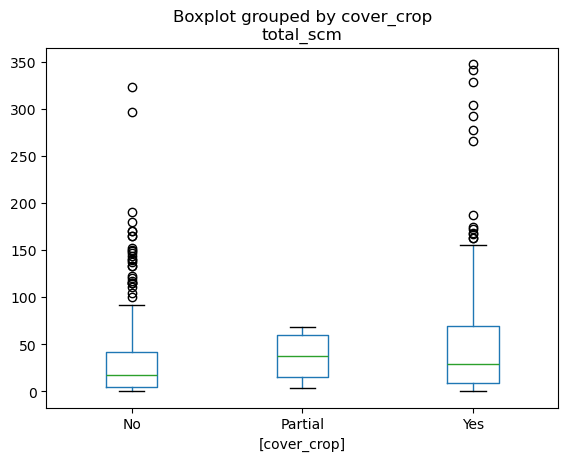

In [37]:
cover_crop[["total_scm", "cover_crop"]].boxplot(by="cover_crop", grid=False)


In [38]:
yes_cc = cover_crop.loc[cover_crop["cover_crop"] == "Yes"]["total_scm"]
no_cc = cover_crop.loc[cover_crop["cover_crop"] == "No"]["total_scm"]
stats.ttest_ind(a=yes_cc, b=no_cc)


TtestResult(statistic=2.505873992875574, pvalue=0.012589507892868841, df=423.0)

In [39]:
manure = adults_management[
    ["record_id", "total_f_scm", "total_m_scm", "total_scm", "manure"]
]
manure["manure"].replace(0, "No", inplace=True)
manure["manure"].replace(1, "Yes", inplace=True)
manure["manure"].replace(2, "NA", inplace=True)
manure


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/4066201180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manure["manure"].replace(0, "No", inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/4066201180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manure["manure"].replace(1, "Yes", inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/4066201180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

record_id  total_f_scm  total_m_scm  total_scm manure
0    DEG_DIE_HILL         15.0         23.0       38.0     No
1    DEG_DIE_HILL         21.0         94.0      115.0     No
2    DEG_DIE_HILL        148.0        176.0      324.0     No
3    DEG_DIE_HILL         33.0        116.0      149.0     No
4    DEG_DIE_HILL          3.0         25.0       28.0     No
..            ...          ...          ...        ...    ...
433       ZUE_REE          3.0          5.0        8.0     No
434       ZUE_REE         68.0         65.0      133.0     No
435       ZUE_REE         93.0         72.0      165.0     No
436       ZUE_REE         24.0         43.0       67.0     No
437       ZUE_REE         78.0        102.0      180.0     No

[438 rows x 5 columns]

In [40]:
yes_manure = manure.loc[manure["manure"] == "Yes"]["total_scm"]
no_manure = manure.loc[manure["manure"] == "No"]["total_scm"]
stats.ttest_ind(a=yes_manure, b=no_manure)


TtestResult(statistic=1.6171102225773455, pvalue=0.10660170995110788, df=422.0)

In [41]:
stats.pointbiserialr(adults_management["total_scm"], adults_management["tillage"])


SignificanceResult(statistic=0.007840422627050377, pvalue=0.8700291176307622)

# Peak Adult Abundance as Response

In [55]:
adult_peak = adults.loc[adults.groupby("record_id")["total_scm"].idxmax()]


In [56]:
adult_peak_climate = adult_peak.merge(
    one_week_climate, on=["record_id", "collection_date"]
)
adult_peak_climate = adult_peak_climate.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_peak_climate.head()


card_id data_collector      record_id collection_date  n_scm_i_m  \
0     2374   Janice Degni   DEG_DIE_HILL      2023-05-04       40.0   
1     2244   Janice Degni    DEG_DIE_SWC      2023-04-21        9.0   
2     2254   Janice Degni  DEG_PER_STRIP      2023-04-27       26.0   
3     2368   Janice Degni        DEG_VIL      2023-05-04       91.0   
4     2318  Shea Crowther        DIP_CUR      2023-05-02       45.0   

   n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o  ...  \
0       20.0      136.0      128.0              9.0             44.0  ...   
1       26.0        0.0        3.0              0.0              0.0  ...   
2       13.0        4.0        3.0              0.0              0.0  ...   
3       87.0       66.0       60.0              0.0              0.0  ...   
4       20.0       49.0       73.0              0.0              1.0  ...   

  vpd_min_1_week  vpd_max_1_week  rain_inches_1_week  min_temp_f_2_week  \
0        0.31875         5.09375                3.15          37.193333   
1        0.89000        14.39625                0.64          36.560000   
2        0.52875         9.52500                0.58          39.073333   
3        0.32000         4.92875                3.03          37.046667   
4        0.54000         5.22875                3.16          37.373333   

   ave_temp_f_2_week  max_temp_f_2_week  mean_dew_point_2_week  \
0          45.886667          54.580000              37.933333   
1          48.673333          60.786667              34.193333   
2          50.426667          61.793333              39.033333   
3          45.546667          54.086667              37.846667   
4          45.793333          54.240000              36.393333   

   vpd_min_2_week  vpd_max_2_week  rain_inches_2_week  
0        0.460667        7.826000                3.77  
1        1.008000       12.985333                0.64  
2        0.713333       12.900667                1.21  
3        0.446000        7.481333                3.57  
4        0.898000        7.849333                3.71  

[5 rows x 28 columns]

In [44]:
adult_peak_climate_subset = adult_peak_climate[
    [
        "collection_date",
        "n_scm_i_m",
        "n_scm_i_f",
        "n_scm_o_m",
        "n_scm_o_f",
        "n_d_florilega_i",
        "n_d_florilega_o",
        "total_f_scm",
        "total_m_scm",
        "total_scm",
        "min_temp_f_1_week",
        "ave_temp_f_1_week",
        "max_temp_f_1_week",
        "rain_inches_1_week",
        "min_temp_f_2_week",
        "ave_temp_f_2_week",
        "max_temp_f_2_week",
        "rain_inches_2_week",
        "mean_dew_point_1_week",
        "vpd_min_1_week",
        "mean_dew_point_2_week",
        "vpd_min_2_week",
        "vpd_max_2_week", 
        "vpd_max_1_week",
    ]
]

adult_peak_climate_subset["collection_date"] = pd.to_datetime(
    adult_peak_climate_subset["collection_date"], format="%m/%d/%y"
)


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/1124568504.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_peak_climate_subset["collection_date"] = pd.to_datetime(


In [45]:
corr = adult_peak_climate_subset.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


# Soil and Sticky Card Data - Peak

In [46]:
adult_peak_soil = adult_peak.merge(
    soil, on=["record_id"]
)
adult_peak_soil = adult_peak_soil.merge(dairy_one, on='record_id')
adult_peak_soil = adult_peak_soil.drop(['card_id', 'data_collector', 'record_id', 'ny_soils_0', 'ny_soils_01', 'muid', 'hsg', 'hsgw'], axis=1)
adult_peak_soil.head()

collection_date  n_scm_i_m  n_scm_i_f  n_scm_o_m  n_scm_o_f  \
0      2023-05-04       40.0       20.0      136.0      128.0   
1      2023-04-21        9.0       26.0        0.0        3.0   
2      2023-05-18       17.0       36.0        8.0        7.0   
3      2023-05-04       91.0       87.0       66.0       60.0   
4      2023-05-25       77.0       36.0       30.0        9.0   

   n_d_florilega_i  n_d_florilega_o week  total_f_scm  total_m_scm  ...  \
0              9.0             44.0   18        148.0        176.0  ...   
1              0.0              0.0   16         29.0          9.0  ...   
2              0.0              1.0   20         43.0         25.0  ...   
3              0.0              0.0   18        147.0        157.0  ...   
4              0.0              0.0   21         45.0        107.0  ...   

   zn_ppm  cu_ppm  mn_ppm  b_ppm  al_ppm  s_ppm  morgan_p_lb_a  morgan_k_lb_a  \
0     2.6     1.8    33.9    0.3    1546     26           13.9          695.0   
1     3.9    21.0    66.6    0.3    1277     26           10.8          354.9   
2    10.8    21.4    55.7    0.5    1075     32           12.7          816.7   
3     3.3     6.8    45.1    0.2    1578     19           11.2          394.7   
4    25.6    12.7   101.9    1.5     786     30           53.3          268.6   

   morgan_ca_lb_a  morgan_mg_lb_a  
0          2233.2           233.2  
1          2721.4           337.1  
2          2936.8           440.3  
3          1359.7           164.6  
4          6919.0           576.7  

[5 rows x 44 columns]

In [47]:
corr = adult_peak_soil.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

# GDD and Sticky Card Data - Peak

In [48]:
gdd_peak_adults = adult_peak.merge(gdd, left_on=['record_id', 'collection_date'], right_on=['record_id', 'date']).drop(['card_id', 'data_collector', 'record_id'], axis=1)

In [49]:
corr = gdd_peak_adults.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

## Landscape and Sticky Card Data

### 500m

In [50]:
adults_peak_500 = adult_peak.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)

adults_peak_500 = adults_peak_500.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_peak_500["collection_date"] = pd.to_datetime(
    adults_peak_500["collection_date"], format="%m/%d/%y"
)


In [51]:
corr = adults_peak_500.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 1000m

In [52]:
adults_peak_1000 = adult_peak.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)

adults_peak_1000 = adults_peak_1000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_peak_1000["collection_date"] = pd.to_datetime(
    adults_peak_1000["collection_date"], format="%m/%d/%y"
)


In [53]:
corr = adults_peak_1000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 2000m

In [54]:
adults_peak_2000 = adult_peak.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)

adults_peak_2000 = adults_peak_2000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_peak_2000["collection_date"] = pd.to_datetime(
    adults_peak_2000["collection_date"], format="%m/%d/%y"
)


In [55]:
corr = adults_peak_2000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 3000m

In [56]:
adults_peak_3000 = adult_peak.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)

adults_peak_3000 = adults_peak_3000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_peak_3000["collection_date"] = pd.to_datetime(
    adults_peak_3000["collection_date"], format="%m/%d/%y"
)


In [57]:
corr = adults_peak_3000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


# Management and Sticky Card Data - Peaks

In [58]:
adults_peak_management = adult_peak.merge(
    management, left_on="record_id", right_on="field_id"
)


In [59]:
le = preprocessing.LabelEncoder()
adults_peak_management["cover_crop"] = le.fit_transform(
    adults_peak_management["cover_crop"]
)
adults_peak_management["manure"] = le.fit_transform(adults_peak_management["manure"])
adults_peak_management["tillage"] = le.fit_transform(adults_peak_management["tillage"])


In [60]:
stats.pointbiserialr(
    adults_peak_management["total_scm"], adults_peak_management["cover_crop"]
)


SignificanceResult(statistic=0.18263132617703254, pvalue=0.1950136382920231)

In [61]:
cover_crop = adults_peak_management[
    ["record_id", "total_f_scm", "total_m_scm", "total_scm", "cover_crop"]
]
cover_crop["cover_crop"].replace(0, "No", inplace=True)
cover_crop["cover_crop"].replace(1, "Partial", inplace=True)
cover_crop["cover_crop"].replace(2, "Yes", inplace=True)
cover_crop.head()

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/3931330648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover_crop["cover_crop"].replace(0, "No", inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/3931330648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover_crop["cover_crop"].replace(1, "Partial", inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/3931330648.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

record_id  total_f_scm  total_m_scm  total_scm cover_crop
0   DEG_DIE_HILL        148.0        176.0      324.0         No
1    DEG_DIE_SWC         29.0          9.0       38.0         No
2   DEG_FOU_WOOD         43.0         25.0       68.0    Partial
3  DEG_PER_STRIP         16.0         30.0       46.0    Partial
4        DEG_VIL        147.0        157.0      304.0        Yes

<Axes: title={'center': 'total_scm'}, xlabel='[cover_crop]'>

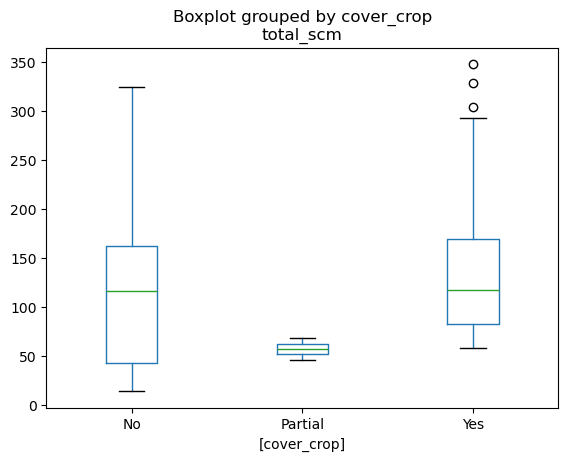

In [62]:
cover_crop[["total_scm", "cover_crop"]].boxplot(by="cover_crop", grid=False)


In [63]:
yes_cc = cover_crop.loc[cover_crop["cover_crop"] == "Yes"]["total_scm"]
no_cc = cover_crop.loc[cover_crop["cover_crop"] == "No"]["total_scm"]
stats.ttest_ind(a=yes_cc, b=no_cc)


TtestResult(statistic=1.3170385866333345, pvalue=0.19407883162475387, df=48.0)

In [64]:
manure = adults_peak_management[
    ["record_id", "total_f_scm", "total_m_scm", "total_scm", "manure"]
]
manure["manure"].replace(0, "No", inplace=True)
manure["manure"].replace(1, "Yes", inplace=True)
manure["manure"].replace(2, "NA", inplace=True)
manure.head()


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/2752141679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manure["manure"].replace(0, "No", inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/2752141679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manure["manure"].replace(1, "Yes", inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_75713/2752141679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

record_id  total_f_scm  total_m_scm  total_scm manure
0   DEG_DIE_HILL        148.0        176.0      324.0     No
1    DEG_DIE_SWC         29.0          9.0       38.0     No
2   DEG_FOU_WOOD         43.0         25.0       68.0     No
3  DEG_PER_STRIP         16.0         30.0       46.0     No
4        DEG_VIL        147.0        157.0      304.0     NA

In [65]:
yes_manure = manure.loc[manure["manure"] == "Yes"]["total_scm"]
no_manure = manure.loc[manure["manure"] == "No"]["total_scm"]
stats.ttest_ind(a=yes_manure, b=no_manure)


TtestResult(statistic=0.010252806825923296, pvalue=0.9918620825114823, df=48.0)

In [66]:
stats.pointbiserialr(adults_management["total_scm"], adults_management["tillage"])

SignificanceResult(statistic=0.007840422627050377, pvalue=0.8700291176307622)

# Create Table - All Features - Peak Abundance

In [58]:
adult_peak_features = adult_peak.merge(one_week_climate, on=["record_id", "collection_date"])
adult_peak_features = adult_peak_features.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_peak_features = adult_peak_features.merge(
    management, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_peak_features = adult_peak_features.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_peak_features = adult_peak_features.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_peak_features = adult_peak_features.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_peak_features = adult_peak_features.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_peak_features = adult_peak_features.merge(
    gdd[
        [
            "record_id",
            "date",
            "gdd_fahrenheit_simple",
            "gdd_fahrenheit_simple_cumsum",
            "gdd_fahrenheit_sine",
            "gdd_fahrenheit_sine_cum_sum",
        ]
    ],
    left_on=["record_id", "collection_date"],
    right_on=["record_id", "date"],
).drop("date", axis=1)
adult_peak_features = adult_peak_features.merge(soil, on='record_id')
adult_peak_features = adult_peak_features.merge(dairy_one, on='record_id')
adult_peak_features = adult_peak_features.merge(sites, on='record_id')

adult_peak_features.to_csv("Data/2023_adult_peak_features.csv")


# Weekly Numbers as Response

## Week 18

In [68]:
adults_week_18 = adults.loc[adults['week'] == '18']
adults_week_18.head()

card_id data_collector      record_id collection_date  n_scm_i_m  \
24      2374   Janice Degni   DEG_DIE_HILL      2023-05-04       40.0   
42      2364   Janice Degni    DEG_DIE_SWC      2023-05-04        5.0   
78      2362   Janice Degni  DEG_PER_STRIP      2023-05-04       11.0   
96      2368   Janice Degni        DEG_VIL      2023-05-04       91.0   
109     2360   Janice Degni  DEG_YOU_BOCES      2023-05-04       28.0   

     n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o week  \
24        20.0      136.0      128.0              9.0             44.0   18   
42        10.0        4.0        3.0              0.0              1.0   18   
78        10.0        5.0       11.0              1.0              1.0   18   
96        87.0       66.0       60.0              0.0              0.0   18   
109       15.0       22.0        9.0              1.0              0.0   18   

     total_f_scm  total_m_scm  total_scm  
24         148.0        176.0      324.0  
42          13.0          9.0       22.0  
78          21.0         16.0       37.0  
96         147.0        157.0      304.0  
109         24.0         50.0       74.0

In [69]:
adults_week_18_features = adults_week_18.merge(one_week_climate, on=["record_id", "collection_date"])
adults_week_18_features = adults_week_18_features.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adults_week_18_features = adults_week_18_features.merge(
    management, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adults_week_18_features = adults_week_18_features.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adults_week_18_features = adults_week_18_features.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adults_week_18_features = adults_week_18_features.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adults_week_18_features = adults_week_18_features.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adults_week_18_features = adults_week_18_features.merge(
    gdd[
        [
            "record_id",
            "date",
            "gdd_fahrenheit_simple",
            "gdd_fahrenheit_simple_cumsum",
            "gdd_fahrenheit_sine",
            "gdd_fahrenheit_sine_cum_sum",
        ]
    ],
    left_on=["record_id", "collection_date"],
    right_on=["record_id", "date"],
).drop("date", axis=1)
adults_week_18_features = adults_week_18_features.merge(soil, on='record_id')
adults_week_18_features = adults_week_18_features.merge(dairy_one, on='record_id')

adults_week_18_features.to_csv("Data/2023_adult_week_18_features.csv")


# Random Forests

In [125]:
dummies = pd.get_dummies(
    data=adult_features,
    columns=[
        "data_collector",
        "record_id",
        "previous_crop",
        "cover_crop",
        "manure",
        "tillage",
        "muid",
        "hsg",
    ],
)
merged = pd.concat([adult_features, dummies], axis="columns")
merged = merged.T.drop_duplicates().T
merged = merged.drop(
    [
        "data_collector",
        "record_id",
        "previous_crop",
        "cover_crop",
        "manure",
        "tillage",
        "muid",
        "hsg",
        "card_id",
        "n_scm_i_m",
        "n_scm_i_f",
        "n_scm_o_m",
        "n_scm_o_f",
        "n_d_florilega_i",
        "n_d_florilega_o",
        "week",
        "total_f_scm",
        "total_m_scm",
    ],
    axis="columns",
)
merged["day_of_year"] = adult_features["collection_date"].dt.dayofyear
merged = merged.drop("collection_date", axis=1)
merged


total_scm min_temp_f_1_week ave_temp_f_1_week max_temp_f_1_week  \
0        38.0            40.825           52.8125              64.8   
1       115.0             36.15            46.525           56.8875   
2       324.0           37.7375            44.675           51.6125   
3       149.0           36.6125            47.925             59.25   
4        28.0             37.45           51.8125              66.2   
..        ...               ...               ...               ...   
397       8.0              47.8             60.05           72.3125   
398     133.0             38.75           47.7625              56.8   
399     165.0           38.4625            46.125           53.7625   
400      67.0           45.5875              57.9           70.2125   
401     180.0           44.3375           55.6125           66.8875   

    mean_dew_point_1_week vpd_min_1_week vpd_max_1_week rain_inches_1_week  \
0                   40.15        0.84875       14.81875               0.62   
1                 36.8125          0.565       10.19875               0.74   
2                  38.775        0.31875        5.09375               3.15   
3                  37.525            0.3       10.51125               0.38   
4                 35.9375          0.745       16.07125                0.0   
..                    ...            ...            ...                ...   
397               42.3875         2.8325          20.01               0.38   
398                37.375          0.835       10.20625               1.15   
399                39.475        0.42625        5.83875               1.95   
400                  38.1        3.31625       18.68125                0.0   
401                39.575          2.355        14.8875               0.71   

    min_temp_f_2_week ave_temp_f_2_week  ... muid_NY129 muid_NY131 muid_NY134  \
0           36.453333         48.846667  ...      False      False      False   
1           39.513333         51.126667  ...      False      False      False   
2           37.193333         45.886667  ...      False      False      False   
3           37.206667         46.666667  ...      False      False      False   
4           37.013333         49.786667  ...      False      False      False   
..                ...               ...  ...        ...        ...        ...   
397         41.393333              53.1  ...      False       True      False   
398         43.806667         54.886667  ...      False       True      False   
399             39.04         47.613333  ...      False       True      False   
400         43.186667             53.94  ...      False       True      False   
401         45.026667         56.393333  ...      False       True      False   

    muid_NY138 muid_NY142 muid_NY149  hsg_A  hsg_B  hsg_C day_of_year  
0        False      False      False  False  False   True         111  
1        False      False      False  False  False   True         117  
2        False      False      False  False  False   True         124  
3        False      False      False  False  False   True         131  
4        False      False      False  False  False   True         138  
..         ...        ...        ...    ...    ...    ...         ...  
397      False      False      False   True  False  False         109  
398      False      False      False   True  False  False         116  
399      False      False      False   True  False  False         122  
400      False      False      False   True  False  False         137  
401      False      False      False   True  False  False         143  

[402 rows x 398 columns]

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
# load the data
X = merged.drop(['total_scm'], axis=1)
y = merged['total_scm']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

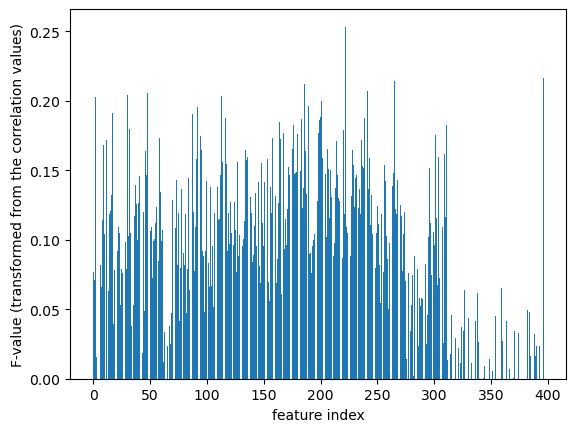

In [127]:
# feature selection
selector = SelectKBest(score_func=mutual_info_regression, k=10)
# learn relationship from training data
selector.fit(X_train, y_train)
# transform train input data
X_train_fs = selector.transform(X_train)
# transform test input data
X_test_fs = selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [128]:
cols_idxs = selector.get_support(indices=True)
features_df_new = merged.iloc[:,cols_idxs]
features_df_new.columns

Index(['ave_temp_f_1_week', 'total_nat_prop_2019_500', 'ag_prop_3 year_500',
       'ag_prop_4 year_1000', 'semi_nat_prop_5 year_2000',
       'forest_prop_4 year_2000', 'total_nat_prop_2019_3000',
       'ag_prop_4 year_3000', 'forest_prop_4 year_3000', 'hsg_C'],
      dtype='object')

# Landscape Random Forest

In [95]:
landscape = adults.merge(cdl_500, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

landscape = landscape.merge(cdl_1000, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

landscape = landscape.merge(cdl_2000, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

landscape = landscape.merge(cdl_3000, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

landscape.head()

card_id data_collector     record_id collection_date  n_scm_i_m  n_scm_i_f  \
0     2246   Janice Degni  DEG_DIE_HILL      2023-04-21       16.0       10.0   
1     2266   Janice Degni  DEG_DIE_HILL      2023-04-27       43.0        9.0   
2     2374   Janice Degni  DEG_DIE_HILL      2023-05-04       40.0       20.0   
3     2560   Janice Degni  DEG_DIE_HILL      2023-05-11       80.0       18.0   
4     2558   Janice Degni  DEG_DIE_HILL      2023-05-18       21.0        0.0   

   n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o  ...  \
0        7.0        5.0              0.0              0.0  ...   
1       51.0       12.0              0.0              0.0  ...   
2      136.0      128.0              9.0             44.0  ...   
3       36.0       15.0              3.0              0.0  ...   
4        4.0        3.0              0.0              0.0  ...   

  wheat_prop_4 year_3000  wheat_prop_5 year_3000  forest_prop_2 year_3000  \
0               0.000451                0.000451                 0.311071   
1               0.000451                0.000451                 0.311071   
2               0.000451                0.000451                 0.311071   
3               0.000451                0.000451                 0.311071   
4               0.000451                0.000451                 0.311071   

   forest_prop_3 year_3000  forest_prop_4 year_3000  forest_prop_5 year_3000  \
0                 0.311644                 0.319342                 0.316268   
1                 0.311644                 0.319342                 0.316268   
2                 0.311644                 0.319342                 0.316268   
3                 0.311644                 0.319342                 0.316268   
4                 0.311644                 0.319342                 0.316268   

   total_nat_prop_2 year_3000  total_nat_prop_3 year_3000  \
0                    0.519178                    0.519094   
1                    0.519178                    0.519094   
2                    0.519178                    0.519094   
3                    0.519178                    0.519094   
4                    0.519178                    0.519094   

   total_nat_prop_4 year_3000  total_nat_prop_5 year_3000  
0                    0.513421                    0.510176  
1                    0.513421                    0.510176  
2                    0.513421                    0.510176  
3                    0.513421                    0.510176  
4                    0.513421                    0.510176  

[5 rows x 302 columns]

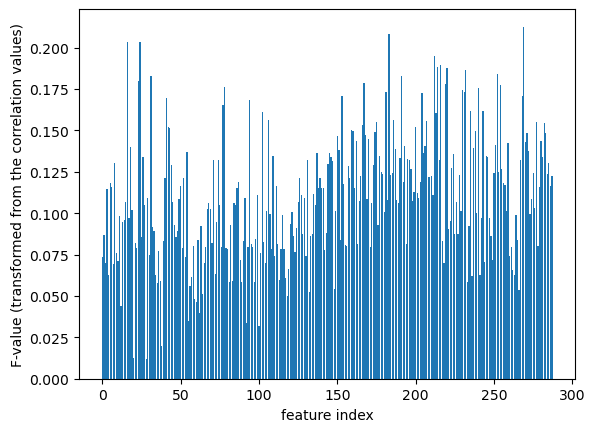

In [177]:
X = landscape.drop(['total_scm', 'card_id', 'data_collector', 'record_id', 'collection_date', 'n_scm_i_m', 'n_scm_i_f', 'n_scm_o_m', 'n_scm_o_f', 'n_d_florilega_i',
       'n_d_florilega_o', 'week', 'total_f_scm', 'total_m_scm'], axis=1)
y = landscape['total_scm']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# feature selection
selector = SelectKBest(score_func=mutual_info_regression, k=10)
# learn relationship from training data
selector.fit(X_train, y_train)
# transform train input data
X_train_fs = selector.transform(X_train)
# transform test input data
X_test_fs = selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [141]:
cols_idxs = selector.get_support(indices=True)
features_df_new = merged.iloc[:,cols_idxs]
features_df_new.columns

Index(['nat_prop_2018_500', 'ag_prop_2019_500', 'nat_prop_2019_500',
       'semi_nat_prop_2 year_2000', 'wheat_prop_2018_3000',
       'total_nat_prop_2018_3000', 'nat_prop_2019_3000',
       'wheat_prop_2019_3000', 'ag_prop_3 year_3000',
       'total_nat_prop_4 year_3000'],
      dtype='object')

# Soil Random Forest

In [168]:
soil.columns

Index(['record_id', 'ny_soils_0', 'ny_soils_01', 'muid', 'hsg', 'hsgint',
       'muserial', 'hsga', 'hsgb', 'hsgc', 'hsgd', 'hsgw'],
      dtype='object')

In [175]:
soil_rf = adults.merge(soil, on="record_id")

soil_rf = soil_rf.merge(dairy_one, on='record_id')

soil_rf

card_id data_collector     record_id collection_date  n_scm_i_m  \
0       2246   Janice Degni  DEG_DIE_HILL      2023-04-21       16.0   
1       2266   Janice Degni  DEG_DIE_HILL      2023-04-27       43.0   
2       2374   Janice Degni  DEG_DIE_HILL      2023-05-04       40.0   
3       2560   Janice Degni  DEG_DIE_HILL      2023-05-11       80.0   
4       2558   Janice Degni  DEG_DIE_HILL      2023-05-18       21.0   
..       ...            ...           ...             ...        ...   
418     2270  Marion Zuefle       ZUE_REE      2023-04-19        1.0   
419     2272  Marion Zuefle       ZUE_REE      2023-04-26       44.0   
420     2384  Marion Zuefle       ZUE_REE      2023-05-02       45.0   
421     2552  Marion Zuefle       ZUE_REE      2023-05-17       38.0   
422     2636  Marion Zuefle       ZUE_REE      2023-05-23       86.0   

     n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o  ...  \
0         10.0        7.0        5.0              0.0              0.0  ...   
1          9.0       51.0       12.0              0.0              0.0  ...   
2         20.0      136.0      128.0              9.0             44.0  ...   
3         18.0       36.0       15.0              3.0              0.0  ...   
4          0.0        4.0        3.0              0.0              0.0  ...   
..         ...        ...        ...              ...              ...  ...   
418        2.0        4.0        1.0              0.0              0.0  ...   
419       34.0       21.0       34.0              0.0              0.0  ...   
420       47.0       27.0       46.0              3.0              4.0  ...   
421       21.0        5.0        3.0              4.0              2.0  ...   
422       68.0       16.0       10.0              0.0              0.0  ...   

    zn_ppm  cu_ppm  mn_ppm  b_ppm  al_ppm  s_ppm morgan_p_lb_a morgan_k_lb_a  \
0      2.6     1.8    33.9    0.3    1546     26          13.9         695.0   
1      2.6     1.8    33.9    0.3    1546     26          13.9         695.0   
2      2.6     1.8    33.9    0.3    1546     26          13.9         695.0   
3      2.6     1.8    33.9    0.3    1546     26          13.9         695.0   
4      2.6     1.8    33.9    0.3    1546     26          13.9         695.0   
..     ...     ...     ...    ...     ...    ...           ...           ...   
418    1.4     1.9   116.4    0.6     716     21           1.0         154.5   
419    1.4     1.9   116.4    0.6     716     21           1.0         154.5   
420    1.4     1.9   116.4    0.6     716     21           1.0         154.5   
421    1.4     1.9   116.4    0.6     716     21           1.0         154.5   
422    1.4     1.9   116.4    0.6     716     21           1.0         154.5   

     morgan_ca_lb_a  morgan_mg_lb_a  
0            2233.2           233.2  
1            2233.2           233.2  
2            2233.2           233.2  
3            2233.2           233.2  
4            2233.2           233.2  
..              ...             ...  
418          2701.6           388.8  
419          2701.6           388.8  
420          2701.6           388.8  
421          2701.6           388.8  
422          2701.6           388.8  

[423 rows x 52 columns]

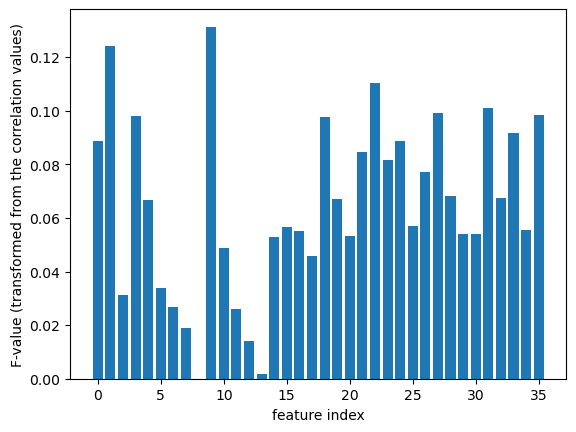

In [181]:
X = soil_rf.drop(['total_scm', 'card_id', 'data_collector', 'record_id', 'collection_date', 'n_scm_i_m', 'n_scm_i_f', 'n_scm_o_m', 'n_scm_o_f', 'n_d_florilega_i',
       'n_d_florilega_o', 'week', 'total_f_scm', 'total_m_scm', 'muid', 'hsg'], axis=1)
y = soil_rf['total_scm']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# feature selection
selector = SelectKBest(score_func=mutual_info_regression, k=5)
# learn relationship from training data
selector.fit(X_train, y_train)
# transform train input data
X_train_fs = selector.transform(X_train)
# transform test input data
X_test_fs = selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [182]:
cols_idxs = selector.get_support(indices=True)
features_df_new = merged.iloc[:,cols_idxs]
features_df_new.columns

Index(['min_temp_f_1_week', 'ave_temp_f_2_week', 'total_nat_prop_2018_500',
       'soybean_prop_2019_500', 'ag_prop_2020_500'],
      dtype='object')

# Climate Random Forest

In [172]:
climate_rf = adults.merge(one_week_climate, on=["record_id", 'collection_date'])

climate_rf = climate_rf.merge(two_week_climate, on=["record_id", 'collection_date'])

climate_rf.head()


card_id data_collector     record_id collection_date  n_scm_i_m  n_scm_i_f  \
0     2246   Janice Degni  DEG_DIE_HILL      2023-04-21       16.0       10.0   
1     2266   Janice Degni  DEG_DIE_HILL      2023-04-27       43.0        9.0   
2     2374   Janice Degni  DEG_DIE_HILL      2023-05-04       40.0       20.0   
3     2560   Janice Degni  DEG_DIE_HILL      2023-05-11       80.0       18.0   
4     2558   Janice Degni  DEG_DIE_HILL      2023-05-18       21.0        0.0   

   n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o  ... vpd_min_1_week  \
0        7.0        5.0              0.0              0.0  ...        0.84875   
1       51.0       12.0              0.0              0.0  ...        0.56500   
2      136.0      128.0              9.0             44.0  ...        0.31875   
3       36.0       15.0              3.0              0.0  ...        0.30000   
4        4.0        3.0              0.0              0.0  ...        0.74500   

   vpd_max_1_week  rain_inches_1_week  min_temp_f_2_week  ave_temp_f_2_week  \
0        14.81875                0.62          36.453333          48.846667   
1        10.19875                0.74          39.513333          51.126667   
2         5.09375                3.15          37.193333          45.886667   
3        10.51125                0.38          37.206667          46.666667   
4        16.07125                0.00          37.013333          49.786667   

   max_temp_f_2_week  mean_dew_point_2_week  vpd_min_2_week  vpd_max_2_week  \
0          61.233333              34.286667        0.940667       13.328000   
1          62.740000              39.380000        0.731333       13.578667   
2          54.580000              37.933333        0.460667        7.826000   
3          56.126667              38.220000        0.304000        8.134667   
4          62.580000              36.780000        0.534000       13.219333   

   rain_inches_2_week  
0                0.62  
1                1.36  
2                3.77  
3                3.39  
4                0.38  

[5 rows x 28 columns]

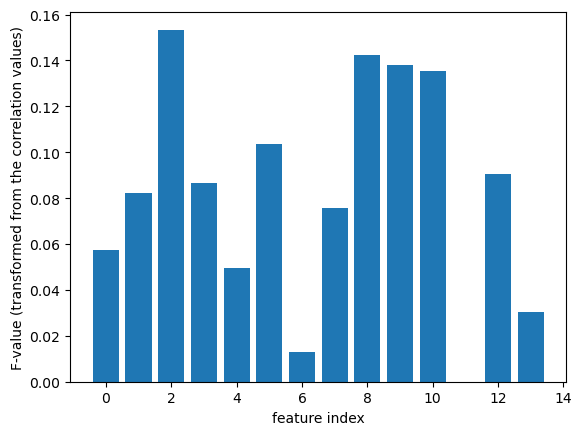

In [179]:
X = climate_rf.drop(['total_scm', 'card_id', 'data_collector', 'record_id', 'collection_date', 'n_scm_i_m', 'n_scm_i_f', 'n_scm_o_m', 'n_scm_o_f', 'n_d_florilega_i',
       'n_d_florilega_o', 'week', 'total_f_scm', 'total_m_scm'], axis=1)
y = climate_rf['total_scm']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# feature selection
selector = SelectKBest(score_func=mutual_info_regression, k=5)
# learn relationship from training data
selector.fit(X_train, y_train)
# transform train input data
X_train_fs = selector.transform(X_train)
# transform test input data
X_test_fs = selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [174]:
cols_idxs = selector.get_support(indices=True)
features_df_new = merged.iloc[:,cols_idxs]
features_df_new.columns

Index(['ave_temp_f_1_week', 'vpd_min_1_week', 'min_temp_f_2_week',
       'ave_temp_f_2_week', 'max_temp_f_2_week'],
      dtype='object')

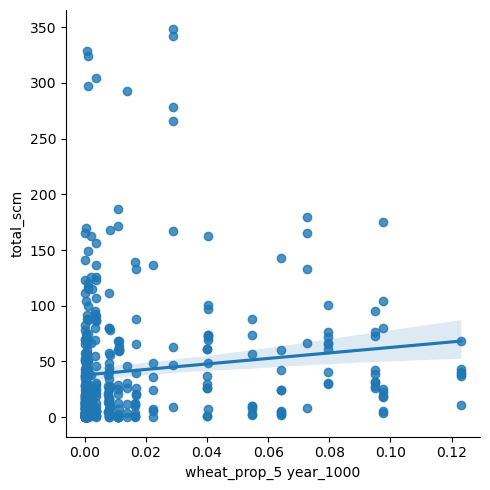

In [195]:
sns.lmplot(x='wheat_prop_5 year_1000', y="total_scm", data=adult_features)


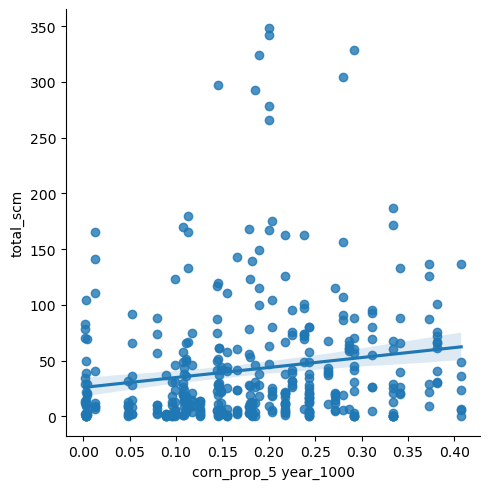

In [196]:
sns.lmplot(x='corn_prop_5 year_1000', y="total_scm", data=adult_features)

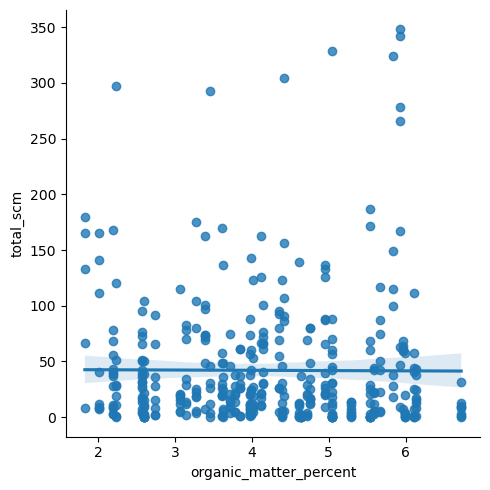

In [198]:
sns.lmplot(x='organic_matter_percent', y="total_scm", data=adult_features)

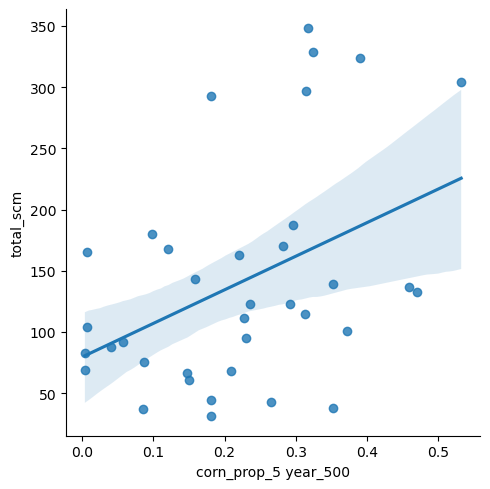

In [60]:
sns.lmplot(x='corn_prop_5 year_500', y="total_scm", data=adult_peak_features)